In [1]:
import numpy as np
from athena_read import athdf
import matplotlib.pyplot as plt
import Constants 
c=Constants.Constants()

%matplotlib inline
base_dir = '../../../data/TDSC/M20_B0.5_R2_D0.02_PR/'

Constants defined...


In [2]:
import matplotlib as mpl

mpl.rcParams.update({
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "mathtext.default": "regular",
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "axes.unicode_minus": True,
    
    # Log scale specific additions
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "xtick.minor.width": 0.8,
    "ytick.minor.width": 0.8,
    "xtick.minor.top": True,
    "xtick.minor.bottom": True,
    "ytick.minor.left": True,
    "ytick.minor.right": True,
})

In [3]:
myfile=base_dir + "COLL.out1."+"00050"+".athdf"
d = athdf(myfile)
X,Y = np.meshgrid(d['x1f'], d['x2f'], indexing='ij')

Text(0, 0.5, 'y')

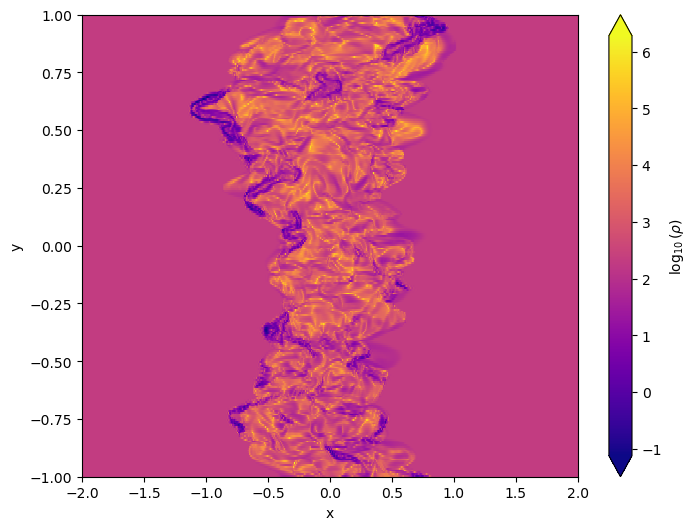

In [3]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
contour = ax.pcolormesh(X, Y, (np.log10(2*d['rho']/(d['Bcc1']**2+d['Bcc2']**2+d['Bcc3']**2))[32,:,:]).T,cmap='plasma',shading='auto')
cb1=plt.colorbar(contour,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(0, 0.5, 'y')

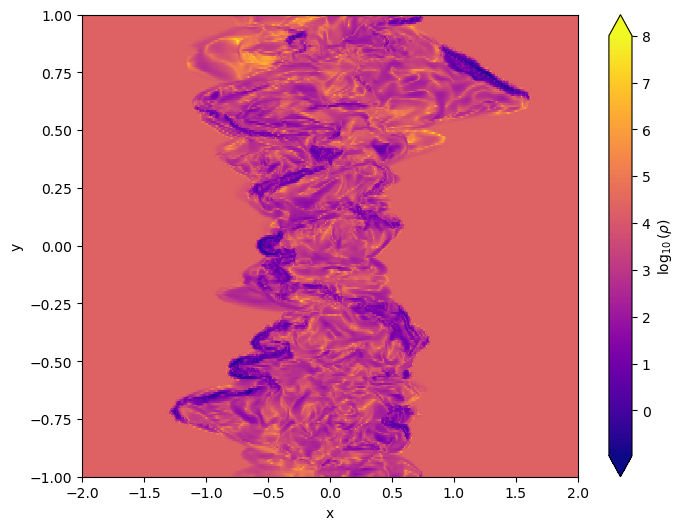

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
contour = ax.pcolormesh(X, Y, (np.log10(2*d['rho']/(d['Bcc1']**2+d['Bcc2']**2+d['Bcc3']**2))[32,:,:]).T,cmap='plasma',shading='auto')
cb1=plt.colorbar(contour,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(0, 0.5, 'y')

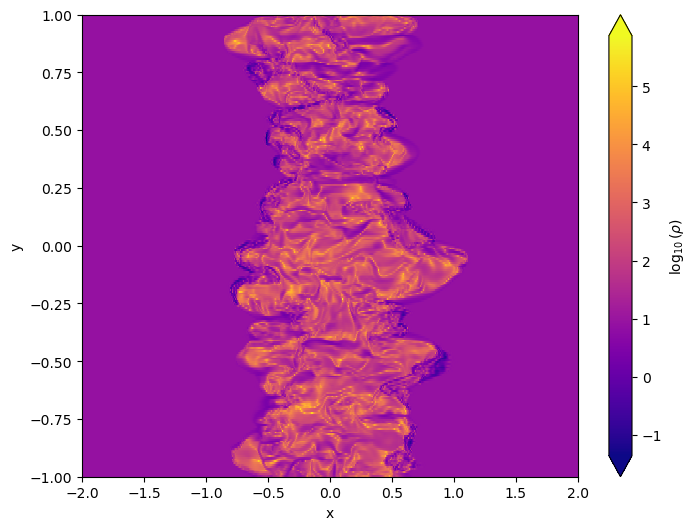

In [9]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
contour = ax.pcolormesh(X, Y, (np.log10(2*d['rho']/(d['Bcc1']**2+d['Bcc2']**2+d['Bcc3']**2))[32,:,:]).T,cmap='plasma',shading='auto')
cb1=plt.colorbar(contour,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(0, 0.5, 'y')

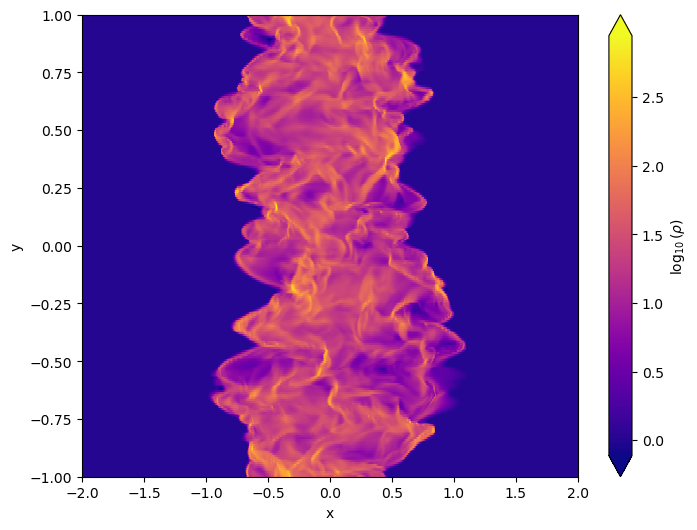

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
contour = ax.pcolormesh(X, Y, (np.log10(d['rho'])[100,:,:]).T,cmap='plasma',shading='auto')
cb1=plt.colorbar(contour,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_xlim(-1,1)
# ax.set_ylim(-2,2)

In [4]:
dx=2/np.shape(d['rho'])[2]
dy=dx; dz=dx

def grad(f, dx, axis):
    return (np.roll(f, -1, axis=axis) - np.roll(f, 1, axis=axis)) / (2 * dx)

# velocity divergence
divv = grad(d['vel1'], dx, 0) + grad(d['vel2'], dy, 1) + grad(d['vel3'], dz, 2)

# compute stretching term numerator
stretch_num = (d['Bcc1'] * grad(d['vel1'], dx, 0) +
               d['Bcc2'] * grad(d['vel2'], dy, 1) +
               d['Bcc3'] * grad(d['vel3'], dz, 2))

Bmag = np.sqrt(d['Bcc1']**2 + d['Bcc2']**2 + d['Bcc3']**2) + 1e-20
gamma_dyn  = stretch_num / Bmag
gamma_comp = -divv

/tmp/ipykernel_280375/1593092901.py:18: RuntimeWarning: divide by zero encountered in log10
  Z = (np.log10(np.abs(gamma_dyn)/(np.abs(gamma_comp)+10e-20))[32,:,:]).T


Text(0, 0.5, 'y')

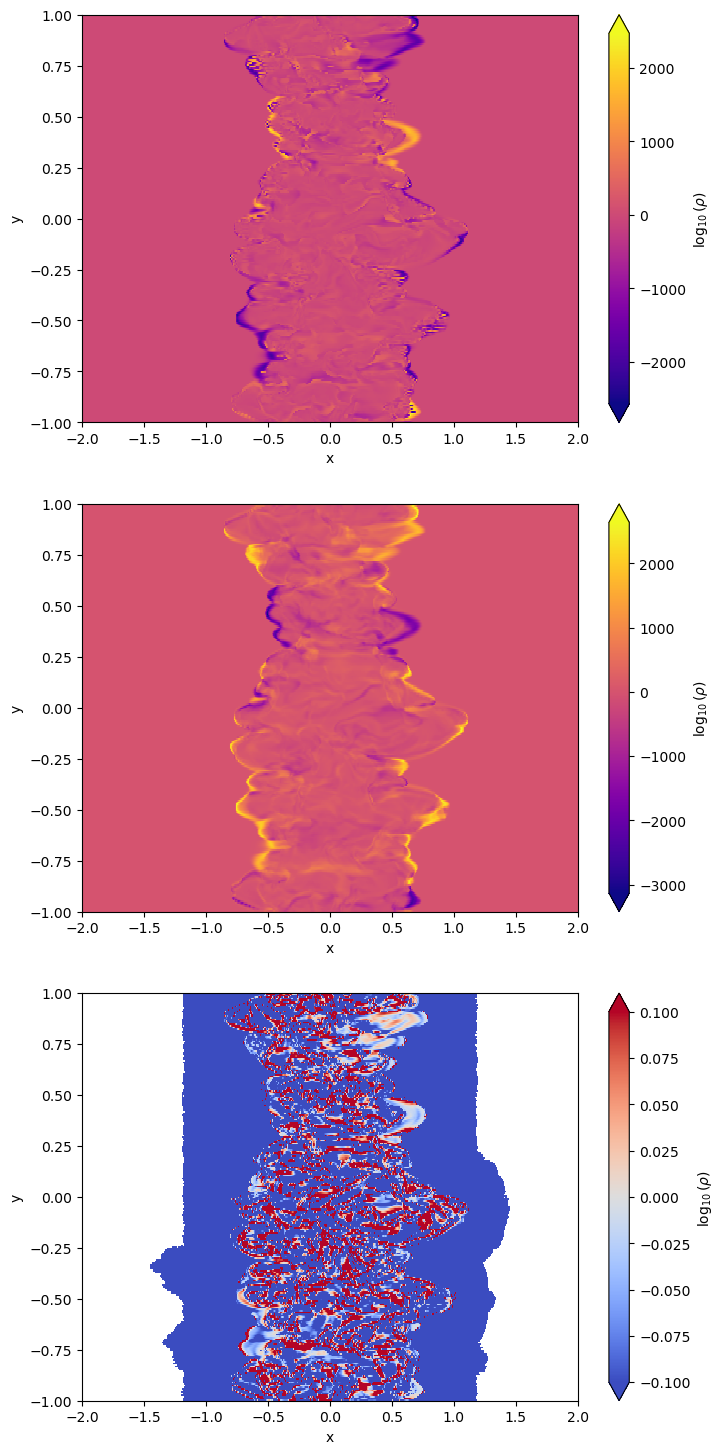

In [31]:
fig = plt.figure(figsize=(8,18))
# First subplot: 2 rows, 1 column, position 1
ax1 = fig.add_subplot(3, 1, 1)

# Second subplot: 2 rows, 1 column, position 2
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
contour1 = ax1.pcolormesh(X, Y, ((gamma_dyn)[32,:,:]).T,cmap='plasma',shading='auto')
cb1=plt.colorbar(contour1,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
contour2 = ax2.pcolormesh(X, Y, (((gamma_comp))[32,:,:]).T,cmap='plasma',shading='auto')
cb2=plt.colorbar(contour2,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax2.set_xlabel("x")
ax2.set_ylabel("y")

from matplotlib.colors import TwoSlopeNorm
Z = (np.log10(np.abs(gamma_dyn)/(np.abs(gamma_comp)+10e-20))[32,:,:]).T

# 2. Define the Pivot Value (the dividing line)
pivot_value = 0

# 3. Define Min/Max for the full color range
z_min = np.min(Z)
z_max = np.max(Z)

# 4. Create the Normalization Object
# The 'center' is set to the pivot_value
norm = TwoSlopeNorm(
    vmin=z_min, 
    vcenter=pivot_value, 
    vmax=z_max
)
contour3 = ax3.pcolormesh(X, Y, Z, cmap='coolwarm', norm=norm,shading='auto')
cb2=plt.colorbar(contour3,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax3.set_xlabel("x")
ax3.set_ylabel("y")

In [6]:
np.mean((np.abs(gamma_dyn)/(np.abs(gamma_comp)+10e-20))[200:312,:,:])

np.float32(1.3748016)

In [26]:
# Perform FFT on the 3D array
shape = np.array(np.shape((d['rho'])))
shape_x = 60

# Generate wavevector coordinates ranging from -k to k
kz = np.fft.fftfreq(shape[0])
ky = np.fft.fftfreq(shape[1])
kx = np.fft.fftfreq(shape_x)

# Shift zero frequency component to the center
kz = np.fft.fftshift(kz)*(shape[0]/1)
ky = np.fft.fftshift(ky)*(shape[1]/1)
kx = np.fft.fftshift(kx)*(shape[2]/2)

# Create a 3D meshgrid for the wavevectors
Kz, Ky, Kx = np.meshgrid(kz, ky, kx, indexing='ij')

In [11]:
fft_vx = np.fft.fftshift(np.fft.fftn(d['vel1']))
fft_vy = np.fft.fftshift(np.fft.fftn(d['vel2']))
fft_vz = np.fft.fftshift(np.fft.fftn(d['vel3']))

k2 = (Kx**2 + Ky**2 + Kz**2)

fft_vx_c = (Kx*fft_vx+Ky*fft_vy+Kz*fft_vz)*Kx/(k2+1e-20)
fft_vy_c = (Kx*fft_vx+Ky*fft_vy+Kz*fft_vz)*Ky/(k2+1e-20)
fft_vz_c = (Kx*fft_vx+Ky*fft_vy+Kz*fft_vz)*Kz/(k2+1e-20)

fft_vx_s = fft_vx-fft_vx_c
fft_vy_s = fft_vy-fft_vy_c
fft_vz_s = fft_vz-fft_vz_c

vx_s = np.fft.ifftn(np.fft.ifftshift(fft_vx_s))
vy_s = np.fft.ifftn(np.fft.ifftshift(fft_vy_s))
vz_s = np.fft.ifftn(np.fft.ifftshift(fft_vz_s))

vx_c = np.fft.ifftn(np.fft.ifftshift(fft_vx_c))
vy_c = np.fft.ifftn(np.fft.ifftshift(fft_vy_c))
vz_c = np.fft.ifftn(np.fft.ifftshift(fft_vz_c))

ValueError: operands could not be broadcast together with shapes (256,256,112) (256,256,512) 

In [27]:
wx = 0.5 * (1 - np.cos(2 * np.pi * np.arange(shape_x) / (shape_x - 1)))
W  = wx[None, None, :]

fft_Bx = np.fft.fftshift(np.fft.fftn((d['Bcc1'][:,:,226:286]-0.5)*W))
fft_By = np.fft.fftshift(np.fft.fftn(d['Bcc2'][:,:,226:286]*W))
fft_Bz = np.fft.fftshift(np.fft.fftn(d['Bcc3'][:,:,226:286]*W))

fft_vax = np.fft.fftshift(np.fft.fftn((d['Bcc1'][:,:,226:286])/d['rho'][:,:,226:286]))
fft_vay = np.fft.fftshift(np.fft.fftn(d['Bcc2'][:,:,226:286]/d['rho'][:,:,226:286]))
fft_vaz = np.fft.fftshift(np.fft.fftn(d['Bcc3'][:,:,226:286]/d['rho'][:,:,226:286]))

In [28]:
k = np.sqrt(Kx**2 + Ky**2 + Kz**2)
# power_spectrum = np.abs(fft_vx)**2+np.abs(fft_vy)**2+np.abs(fft_vz)**2
power_spectrum = np.abs(fft_vax)**2+np.abs(fft_vay)**2+np.abs(fft_vaz)**2

# Bin the k-values to compute the spectrum
k_bins = np.linspace(np.min(k), (np.max(k)), num=500)  # Adjust bin size as needed
energy_spectrum = np.zeros(len(k_bins) - 1)

# Compute the energy in each bin
for i in range(len(k_bins) - 1):
    bin_mask = (k >= k_bins[i]) & (k < k_bins[i + 1])
    energy_spectrum[i] = np.sum(power_spectrum[bin_mask])

# Compute the center of each bin for plotting
bin_centers = 0.5 * (k_bins[:-1] + k_bins[1:])

In [38]:
energy_spectrum[0]=0

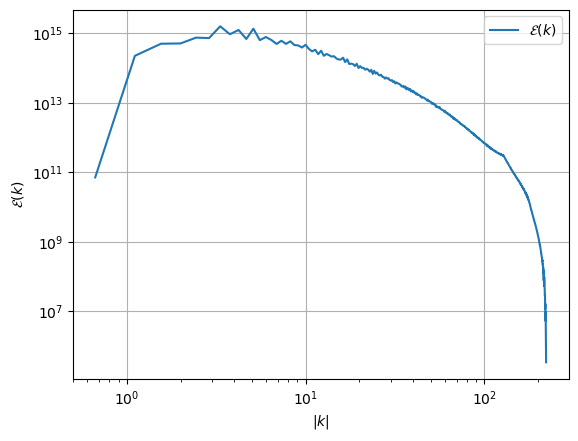

In [16]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label=r'$\mathcal{E}(k)$')
# plt.plot(bin_centers[1:],bin_centers[1:]**(-2)*10**10.2)
# plt.plot(bin_centers[1:],bin_centers[1:]**(-5/3)*10**9.0)
plt.xlabel(r'$|k|$')
plt.ylabel(r'$\mathcal{E}(k)$')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

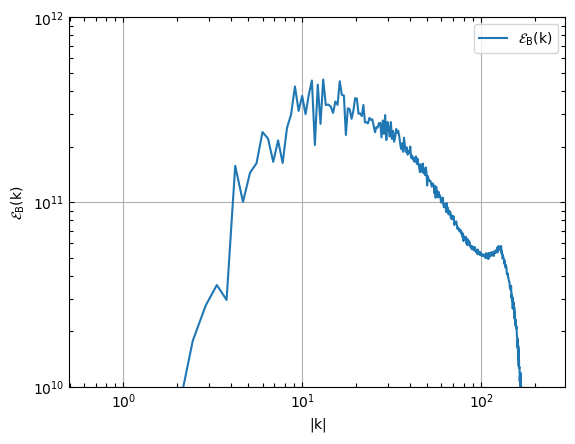

In [21]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label=r'$\mathcal{E}_B(k)$')
# plt.plot(bin_centers[1:],bin_centers[1:]**(-2)*10**10.2)
# plt.plot(bin_centers[1:],bin_centers[1:]**(-5/3)*10**9.0)
plt.xlabel(r'$|k|$')
plt.ylabel(r'$\mathcal{E}_B(k)$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**10,10**12)
plt.grid(True)
plt.legend()
plt.show()

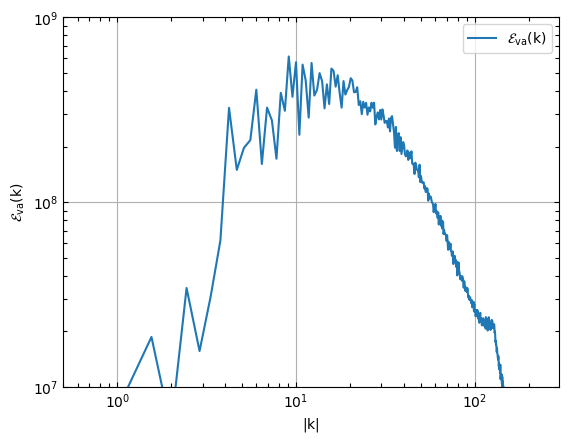

In [30]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label=r'$\mathcal{E}_{va}(k)$')
# plt.plot(bin_centers[1:],bin_centers[1:]**(-2)*10**10.2)
# plt.plot(bin_centers[1:],bin_centers[1:]**(-5/3)*10**9.0)
plt.xlabel(r'$|k|$')
plt.ylabel(r'$\mathcal{E}_{va}(k)$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**7,10**9)
plt.grid(True)
plt.legend()
plt.show()

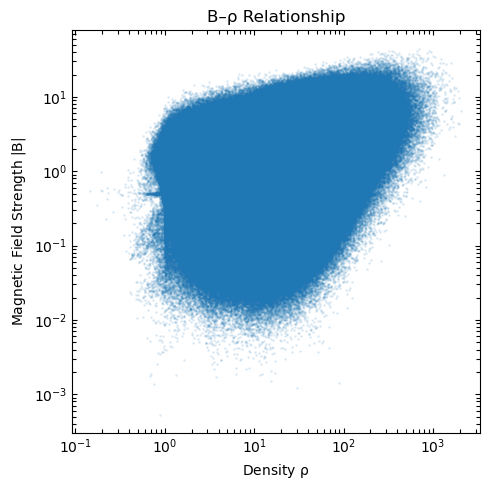

In [35]:
# Flatten both arrays
rvals = d['rho'].ravel()
Bvals = np.sqrt(d['Bcc1']**2+d['Bcc2']**2+d['Bcc3']**2).ravel()

# ----------------------------------------------------------
# Plot B–ρ scaling (log-log scatter)
# ----------------------------------------------------------
plt.figure(figsize=(5,5))
plt.scatter(rvals, Bvals, s=1, alpha=0.1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Density $\rho$")
plt.ylabel(r"Magnetic Field Strength $|B|$")
plt.title("B–ρ Relationship")
plt.tight_layout()
plt.show()

In [36]:
# Fit log-log slope
mask = (rvals > 0) & (Bvals > 0)
coeffs = np.polyfit(np.log10(rvals[mask]), np.log10(Bvals[mask]), 1)
slope = coeffs[0]
print("Estimated B–ρ scaling exponent k ≈", slope)

Estimated B–ρ scaling exponent k ≈ 0.16979576995165502


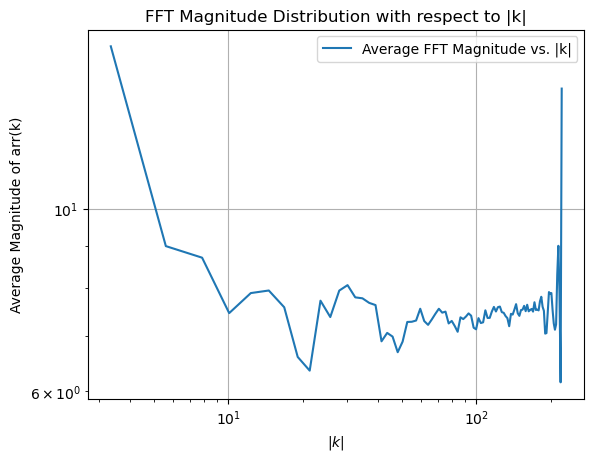

In [17]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label='Average FFT Magnitude vs. |k|')
# plt.plot(bin_centers[1:],bin_centers[1:]**(-2)*10**10.2)
# plt.plot(bin_centers[1:],bin_centers[1:]**(-5/3)*10**9.0)
plt.xlabel(r'$|k|$')
plt.ylabel('Average Magnitude of arr(k)')
plt.title('FFT Magnitude Distribution with respect to |k|')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

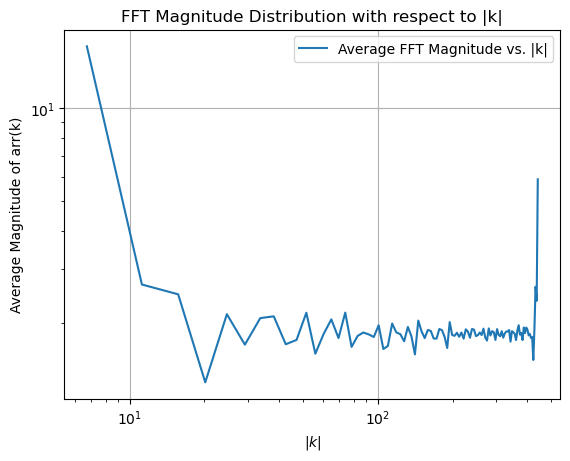

In [30]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label='Average FFT Magnitude vs. |k|')
# plt.plot(bin_centers[1:],bin_centers[1:]**(-2)*10**10.2)
# plt.plot(bin_centers[1:],bin_centers[1:]**(-5/3)*10**9.0)
plt.xlabel(r'$|k|$')
plt.ylabel('Average Magnitude of arr(k)')
plt.title('FFT Magnitude Distribution with respect to |k|')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

In [30]:
cdl_1 = np.loadtxt('dat/M20_B0.1_R2_D0.02_PR.dat')
cdl_01 = np.loadtxt('dat/M20_B0.01_R2_D0.02_PR.dat')
cdl_5 = np.loadtxt('dat/M20_B0.5_R2_D0.02_PR.dat')

Text(0, 0.5, '$B_{cdl}$')

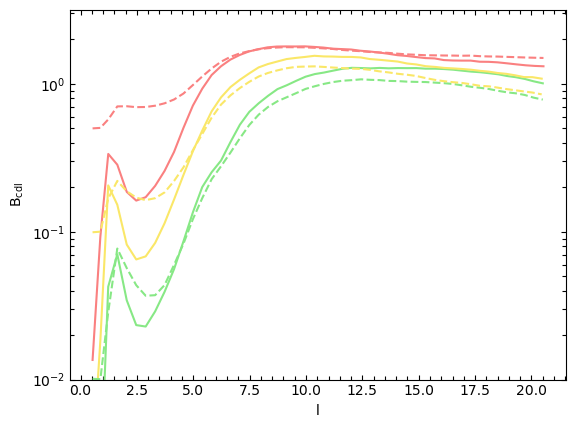

In [39]:
plt.plot(cdl_01[:,1],cdl_01[:,6],'#87e885')
plt.plot(cdl_1[:,1],cdl_1[:,6],'#fae768')
plt.plot(cdl_5[:,1],cdl_5[:,6],'#fa8080')
plt.plot(cdl_01[:,1],cdl_01[:,7],linestyle='--', color='#87e885')
plt.plot(cdl_1[:,1],cdl_1[:,7],linestyle='--', color='#fae768')
plt.plot(cdl_5[:,1],cdl_5[:,7],linestyle='--', color='#fa8080')
plt.ylim(10**-2,10**0.5)
plt.axvline(x=-1)
plt.yscale('log')
plt.xlabel('l')
plt.ylabel(r'$B_{cdl}$')


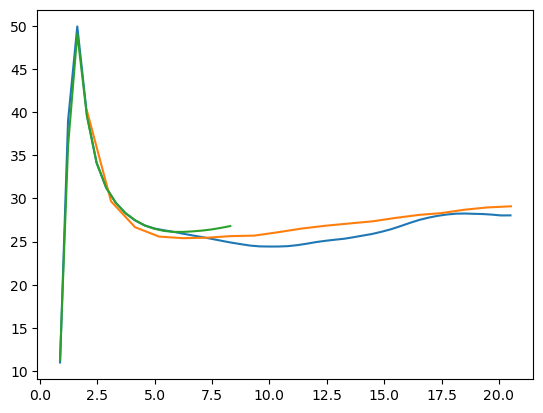

In [9]:
plt.plot(cdl_01[1:,1],cdl_01[1:,0])
plt.plot(cdl_1[1:,1],cdl_1[1:,0])
plt.plot(cdl_5[1:,1],cdl_5[1:,0])